## 목표 :
- 피마 인디언 당뇨병 데이터 세트로 당뇨병 여부 판단해보자
- 예측 모델 : 머신러닝
- 평가 지표 : 정확도, Confusion Maxrit(오차행렬), 재현율, 정밀도, f1스코어, ROC AUC
- https://www.kaggle.com/uciml/pima-indians-diabetes-database : 데이터셋

#### Columns
- Pregnancies : Number of times pregnant 임신횟수
- Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
포도당 부하 검사 수치
- Blood : PressureDiastolic blood pressure (mm Hg)
혈압
- SkinThickness : Triceps skin fold thickness (mm)
피하지방 측정값
- Insulin : 2-Hour serum insulin (mu U/ml)
혈청 인슐린
- BMI : Body mass index (weight in kg/(height in m)^2)
체질량지수
- DiabetesPedigreeFunction : Diabetes pedigree function
당뇨 내력 가중치
- Age : Age (years)
나이
- Outcome : Class variable (0 or 1) 268 of 768 are 1, the others are 0
클래스

## 데이터 불러오기 및 분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler

C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('./datasets/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


- Outcome의 Negative와 Positive 값의 차이가 있음

In [4]:
# feature의 타입과 Null 개수

diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- Null 값은 없고 전부 int, float 숫자형 타입임.

## 데이터 세트 분리

In [6]:
# feature 데이터 세트 x, label 데이터 세트 y
# Outcome이 label 값임. 컬럼 위치 -1을 이용해 추출
x = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=156,
                                                   stratify=y)

## 모델링 하기

In [39]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    roc = roc_auc_score(y_test, pred)
    
    print('오차 행렬')
    print(confusion)
    # f1 스코어 print 추가 
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, ROC:{4:.4f}'
          .format(accuracy, precision, recall, f1, roc))
    

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 trheshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로, 정밀도는 점선
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

    # threshold 값 X축의 scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    # x축, y축 label과 legend, 그리고 grid설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

## 학습, 예측 및 평가

In [40]:
# 데이터 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
# accuracy_score(y_test, pred)
# f1_score(y_test, pred)
get_clf_eval(y_test, pred)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1:0.6804, ROC:0.7556


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


- 재현율 : 59%로 측정
- 병에 걸린 사람을 안걸린 사람을로 판단해서는 안되는 질병 관련 예측은 재현율이 높아야 함.

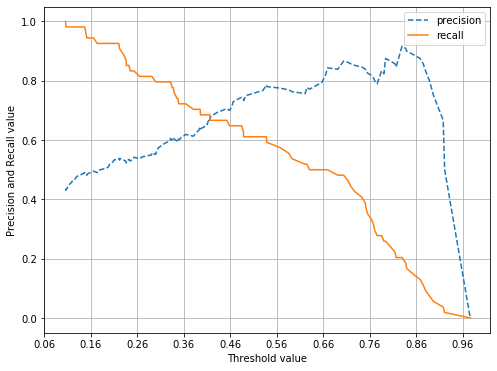

In [41]:
# 임곗값별로 정밀도와 재현율 값 변화 확인
pred_proba_c1 = lr_clf.predict_proba(x_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

- 0.42정도에서 정밀도와 재현율이 균형이 맞춰짐.
- 그러나 수치가 0.7이하임. 여전히 두 지표의 값이 낮음
- 높이기 위해 원본 데이터를 다시 분석

In [42]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- feature의 특징을 알아야하는데 일부 수치에서 min이 0이 나올수 없는 값이 있는데 0인 값이 존재함. 예를 들어 Glucose (Plasma glucose concentration a 2 hours in an oral glucose tolerance test 포도당 부하 검사 수치)

(array([  4.,  19.,  87., 149., 166., 125.,  88.,  54.,  44.,  32.]),
 array([ 44. ,  59.5,  75. ,  90.5, 106. , 121.5, 137. , 152.5, 168. ,
        183.5, 199. ]),
 <a list of 10 Patch objects>)

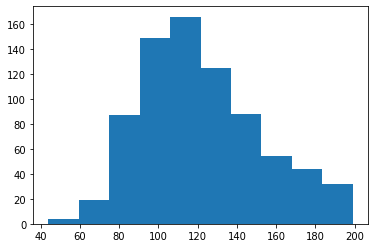

In [43]:
plt.hist(diabetes_data['Glucose'], bins=10)

In [44]:
# min값이 0일 수 없는 피처들 정리
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# diabetes_data[diabetes_data['Glucose']==0]['Glucose'].count()

# feature별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0건수는 0, 퍼센트는 0.00%
BloodPressure 0건수는 0, 퍼센트는 0.00%
SkinThickness 0건수는 0, 퍼센트는 0.00%
Insulin 0건수는 0, 퍼센트는 0.00%
BMI 0건수는 0, 퍼센트는 0.00%


- 'SkinThickness', 'Insulin'은 29%, 48%로 0이 상당히 많음
```
해당 컬럼의 전체 개수
df['column'].count()
컬럼이 0인 개수
df[df['column']==0]['column'].count()
```

## 데이터 전처리
- 0을 평균값으로 대체

In [45]:
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0, mean_zero_features)

# diabetes_data[diabetes_data['Glucose']==0]['Glucose'].count()

In [46]:
x = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

# StandardScaler 클래스를 이용해 feature 데이터 세트에 일괄적으로 스케일링
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.2, random_state=156, stratify=y)

# 데이터 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
# accuracy_score(y_test, pred)
# f1_score(y_test, pred)
get_clf_eval(y_test, pred)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1:0.6804, ROC:0.7556


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 임계값에 따른 평가 수치 출력

In [47]:
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값:", custom_threshold)
        get_clf_eval(y_test, custom_predict)

In [48]:
from sklearn.preprocessing import Binarizer

thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(x_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.3
오차 행렬
[[65 35]
 [11 43]]
정확도: 0.7013, 정밀도: 0.5513, 재현율: 0.7963, F1:0.6515, ROC:0.7231
임곗값: 0.33
오차 행렬
[[71 29]
 [11 43]]
정확도: 0.7403, 정밀도: 0.5972, 재현율: 0.7963, F1:0.6825, ROC:0.7531
임곗값: 0.36
오차 행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222, F1:0.6667, ROC:0.7411
임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037, F1:0.6667, ROC:0.7419
임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667, F1:0.6792, ROC:0.7533
임곗값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667, F1:0.6857, ROC:0.7583
임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1:0.6931, ROC:0.7641
임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1:0.6804, ROC:0.7556


## 결론
- f1 69%, ROC 76%인 임곗값 : 0.48일때가 가장 좋음
- 이때, 정확도 79.9%, 정밀도 74.5%, 재현율 64.8%

## 머신러닝 방법론.
1. 데이터를 수집한다.
2. 데이터를 불러온다.
3. 데이터를 분석한다. : 피처들의 특성, 불필요한 피처, 불필요하고 부정확한 수치 등 파악
4. 데이터를 전처리하다.
5. 데이터를 분리한다. x, y로 나눠주고, split함.
6. 모델을 정의한다. : 여기에서는 다양한 평가지표를 정의함.
7. 모델로 학습, 예측 및 평가한다.
8. 필요에 따라 3번 부터 다시 한다.

# 정리
- 이진 분류에서 레이블 값이 불균형한 경우, 한쪽으로 치우친 경우 : 정확도만으로 예측 성능 평가 X
- 오차행렬(Confusion Matrix)를 통해서 불균형을 확인하고 TN, FP, FN, TP로 확인
- 정확도, 정밀도, 재현율은 오차행렬 값으로 결함해서 도출
- 재현율은 암 양성 예측 모델 즉 양성인데 음성으로 잘못 판단하면 안되는 모델에서 중요
- 재현율과 정밀도는 **임곗값을 조정**하여 조절이 가능
- F1스코어는 정밀도와 재현율을 결합한 평가 지표, 값이 높을 수록 두 평가의 조화로움
- **ROC-AUC는 이진 분류의 성능 평가에서 가장 많이 사용되는 지표** :  면적이 1에 가까울수록 좋음